In [1]:
# This is the import cell
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('data')
data.remove('.DS_Store')
print(data)

['area_pe250_ep51_phi50.txt', 'area_pe450_ep85_phi50.txt', 'area_pe350_ep68_phi50.txt', 'area_pe300_ep60_phi50.txt', 'area_pe500_ep93_phi50.txt', 'area_pe100_ep26_phi50.txt', 'area_pe400_ep76_phi50.txt', 'area_pe150_ep35_phi50.txt', 'area_pe50_ep18_phi50.txt', 'area_pe200_ep43_phi50.txt']


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, ref):
    boolean = False
    for i in xrange(len(fname)):
        if fname[i] == ref[0]:
            for j in xrange(1, len(ref)):
                if fname[i + j] == ref[j]:
                    boolean = True
                    break
    return boolean

def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        index = i + j
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
peList = []
paList = []
pbList = []
xaList = []
epList = []
phiList = []
for i in xrange(len(data)):
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "pa"):
        paList.append(txtValue(data[i], "pa"))
    else:
        paList.append(0)
        
    if checkFile(data[i], "pb"):
        pbList.append(txtValue(data[i], "pb"))
    else:
        pbList.append(0)
        
    if checkFile(data[i], "xa"):
        xaList.append(txtValue(data[i], "xa"))
    else:
        xaList.append(100.)
        
    if checkFile(data[i], "ep"):
        epList.append(txtValue(data[i], "ep"))
    else:
        epList.append(1.)
        
    if checkFile(data[i], "phi"):
        phiList.append(txtValue(data[i], "phi"))
    else:
        phiList.append(60.)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(peList, epList, phiList)
#     indArr = multiSort(paList, epList, phiList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(paList, indArr)
    indSort(pbList, indArr)
    indSort(xaList, indArr)
    indSort(epList, indArr)
    indSort(phiList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('data')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
area_pe50_ep18_phi50.txt
area_pe100_ep26_phi50.txt
area_pe150_ep35_phi50.txt
area_pe200_ep43_phi50.txt
area_pe250_ep51_phi50.txt
area_pe300_ep60_phi50.txt
area_pe350_ep68_phi50.txt
area_pe400_ep76_phi50.txt
area_pe450_ep85_phi50.txt
area_pe500_ep93_phi50.txt


,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,Box_area
0,0.0,50000,0,50000,0,0,0,4,0,4,0,1.0347,1.0347,0.0,0.0,0.50,3.1416,0.0,3.1416,0.0000,0.0,0.0000,78539.82
1,91666.0,50000,0,50000,0,0,0,23,0,23,0,1.0213,1.0213,0.0,0.0,0.50,17.5830,0.0,17.5830,0.0000,0.0,0.0000,78539.82
2,183332.0,50000,0,50000,0,0,0,22,0,22,0,1.0206,1.0206,0.0,0.0,0.50,16.9264,0.0,16.9264,0.0000,0.0,0.0000,78539.82
3,274998.0,50000,0,50000,0,0,0,26,0,26,0,1.0221,1.0221,0.0,0.0,0.50,19.8696,0.0,19.8696,0.0000,0.0,0.0000,78539.82
4,366664.0,50000,0,50000,0,0,0,33,0,33,0,1.0272,1.0272,0.0,0.0,0.50,25.2714,0.0,25.2714,0.0000,0.0,0.0000,78539.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,91299336.0,39276,0,39276,10724,0,10724,1444,0,1444,428,1.0155,1.0155,0.0,0.0,0.49,1097.7635,0.0,1097.7635,8158.2150,0.0,8158.2150,78539.82
997,91391002.0,39900,0,39900,10100,0,10100,1482,0,1482,439,1.0193,1.0193,0.0,0.0,0.49,1124.9377,0.0,1124.9377,7681.2009,0.0,7681.2009,78539.82
998,91482668.0,39426,0,39426,10574,0,10574,1292,0,1292,440,1.0232,1.0232,0.0,0.0,0.49,980.6970,0.0,980.6970,8044.7040,0.0,8044.7040,78539.82
999,91574334.0,39056,0,39056,10944,0,10944,1486,0,1486,456,1.0135,1.0135,0.0,0.0,0.49,1127.8306,0.0,1127.8306,8325.3582,0.0,8325.3582,78539.82


In [5]:
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * 0.00001))
    return 1. / tstepPerTau

# Grab the parameters from each file, store in a dataframe
headers = ['partAll', 'partA', 'partB', 'pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in xrange(len(all_data)):
    partAll = all_data[i]['Gas_tot'][0] + all_data[i]['Dense_tot'][0]
    partA = all_data[i]['Gas_A'][0] + all_data[i]['Dense_A'][0]
    partB = all_data[i]['Gas_B'][0] + all_data[i]['Dense_B'][0]
    pe = int(peList[i])
    pa = int(paList[i])
    pb = int(pbList[i])
    xa = float(xaList[i])
    ep = int(epList[i])
    phi = float(phiList[i])
    tauPerdt = computeTauPerTstep(ep)
    df = pd.DataFrame([[partAll, partA, partB, pe, pa, pb, xa, ep, phi, tauPerdt]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,partAll,partA,partB,pe,peA,peB,xA,eps,phi,tauPer_dt
0,50000,50000,0,50,0,0,100.0,18,50.0,5.555559e-07
1,50000,50000,0,100,0,0,100.0,26,50.0,3.846154e-07
2,50000,50000,0,150,0,0,100.0,35,50.0,2.857144e-07
3,50000,50000,0,200,0,0,100.0,43,50.0,2.325581e-07
4,50000,50000,0,250,0,0,100.0,51,50.0,1.960784e-07
5,50000,50000,0,300,0,0,100.0,60,50.0,1.666667e-07
6,50000,50000,0,350,0,0,100.0,68,50.0,1.470588e-07
7,50000,50000,0,400,0,0,100.0,76,50.0,1.315790e-07
8,50000,50000,0,450,0,0,100.0,85,50.0,1.176471e-07
9,50000,50000,0,500,0,0,100.0,93,50.0,1.075269e-07


In [6]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_data)):
    # Move timestep column from timesteps to rotational relaxation time
    all_data[i]['Timestep'] *= params['tauPer_dt'][i] * 3.0
    
    # New column for number of clusters
    all_data[i]['nClust'] = all_data[i]['Dense_tot'] / all_data[i]['MCS']
    
    # New column for area of gas phase
    all_data[i]['a_gas'] = all_data[i]['Box_area'] - all_data[i]['den_area']
    
    # New columns for area fractions:
    all_data[i]['phiLC_A'] = all_data[i]['Lc_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiLC_B'] = all_data[i]['Lc_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiLC'] = all_data[i]['lc_area'] / all_data[i]['Box_area']
    all_data[i]['phiC_A'] = all_data[i]['den_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiC_B'] = all_data[i]['den_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiC'] = all_data[i]['den_area'] / all_data[i]['Box_area']
    all_data[i]['phiG_A'] = (all_data[i]['Gas_A'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG_B'] = (all_data[i]['Gas_B'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG'] = (all_data[i]['Gas_tot'] * np.pi * 0.25) / all_data[i]['Box_area']
    
    # New columns for number densities:
    all_data[i]['rhoLC_A'] = all_data[i]['Lc_numA'] / all_data[i]['lc_area']
    all_data[i]['rhoLC_B'] = all_data[i]['Lc_numB'] / all_data[i]['lc_area']
    all_data[i]['rhoLC'] = all_data[i]['Lg_clust'] / all_data[i]['lc_area']
    all_data[i]['rhoC_A'] = all_data[i]['Dense_A'] / all_data[i]['den_area']
    all_data[i]['rhoC_B'] = all_data[i]['Dense_B'] / all_data[i]['den_area']
    all_data[i]['rhoC'] = all_data[i]['Dense_tot'] / all_data[i]['den_area']
    all_data[i]['rhoG_A'] = all_data[i]['Gas_A'] / all_data[i]['a_gas']
    all_data[i]['rhoG_B'] = all_data[i]['Gas_B'] / all_data[i]['a_gas']
    all_data[i]['rhoG'] = all_data[i]['Gas_tot'] / all_data[i]['a_gas']
    
    # Ger rid of NaN in favor of 0
    all_data[i].fillna(0, inplace=True)

# display(all_data[0][0])
display(all_data[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,Box_area,nClust,a_gas,phiLC_A,phiLC_B,phiLC,phiC_A,phiC_B,phiC,phiG_A,phiG_B,phiG,rhoLC_A,rhoLC_B,rhoLC,rhoC_A,rhoC_B,rhoC,rhoG_A,rhoG_B,rhoG
0,0.000000,50000,0,50000,0,0,0,4,0,4,0,1.0347,1.0347,0.0,0.0,0.50,3.1416,0.0,3.1416,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000040,0.0,0.000040,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.273237,0.0,1.273237,0.000000,0.0,0.000000,0.636620,0.0,0.636620
1,0.152777,50000,0,50000,0,0,0,23,0,23,0,1.0213,1.0213,0.0,0.0,0.50,17.5830,0.0,17.5830,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000224,0.0,0.000224,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.308082,0.0,1.308082,0.000000,0.0,0.000000,0.636620,0.0,0.636620
2,0.305554,50000,0,50000,0,0,0,22,0,22,0,1.0206,1.0206,0.0,0.0,0.50,16.9264,0.0,16.9264,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000216,0.0,0.000216,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.299745,0.0,1.299745,0.000000,0.0,0.000000,0.636620,0.0,0.636620
3,0.458330,50000,0,50000,0,0,0,26,0,26,0,1.0221,1.0221,0.0,0.0,0.50,19.8696,0.0,19.8696,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000253,0.0,0.000253,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.308532,0.0,1.308532,0.000000,0.0,0.000000,0.636620,0.0,0.636620
4,0.611107,50000,0,50000,0,0,0,33,0,33,0,1.0272,1.0272,0.0,0.0,0.50,25.2714,0.0,25.2714,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000322,0.0,0.000322,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.305824,0.0,1.305824,0.000000,0.0,0.000000,0.636620,0.0,0.636620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,152.165645,39276,0,39276,10724,0,10724,1444,0,1444,428,1.0155,1.0155,0.0,0.0,0.49,1097.7635,0.0,1097.7635,8158.2150,0.0,8158.2150,78539.82,25.056075,70381.6050,0.013977,0.0,0.013977,0.103874,0.0,0.103874,0.39276,0.0,0.39276,1.315402,0.0,1.315402,1.314503,0.0,1.314503,0.558044,0.0,0.558044
997,152.318421,39900,0,39900,10100,0,10100,1482,0,1482,439,1.0193,1.0193,0.0,0.0,0.49,1124.9377,0.0,1124.9377,7681.2009,0.0,7681.2009,78539.82,23.006834,70858.6191,0.014323,0.0,0.014323,0.097800,0.0,0.097800,0.39900,0.0,0.39900,1.317406,0.0,1.317406,1.314899,0.0,1.314899,0.563093,0.0,0.563093
998,152.471198,39426,0,39426,10574,0,10574,1292,0,1292,440,1.0232,1.0232,0.0,0.0,0.49,980.6970,0.0,980.6970,8044.7040,0.0,8044.7040,78539.82,24.031818,70495.1160,0.012487,0.0,0.012487,0.102428,0.0,0.102428,0.39426,0.0,0.39426,1.317430,0.0,1.317430,1.314405,0.0,1.314405,0.559273,0.0,0.559273
999,152.623975,39056,0,39056,10944,0,10944,1486,0,1486,456,1.0135,1.0135,0.0,0.0,0.49,1127.8306,0.0,1127.8306,8325.3582,0.0,8325.3582,78539.82,24.000000,70214.4618,0.014360,0.0,0.014360,0.106002,0.0,0.106002,0.39056,0.0,0.39056,1.317574,0.0,1.317574,1.314538,0.0,1.314538,0.556239,0.0,0.556239


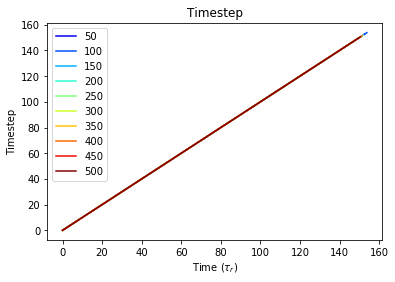

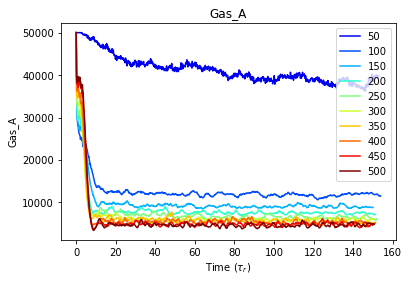

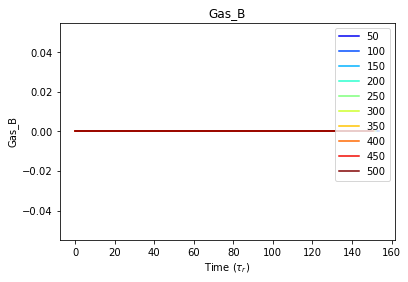

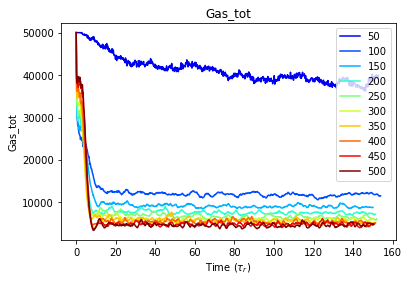

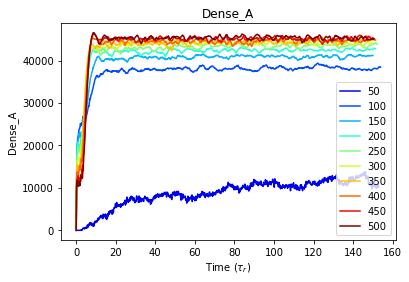

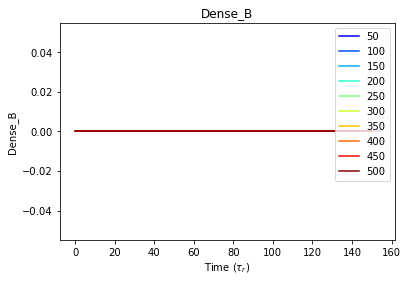

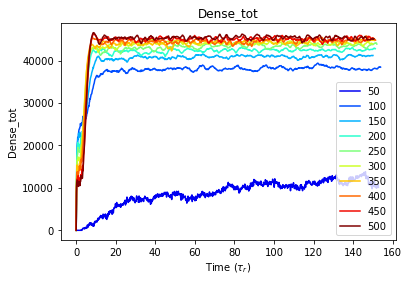

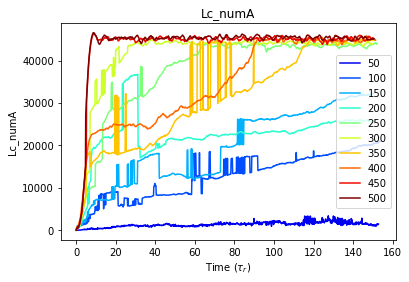

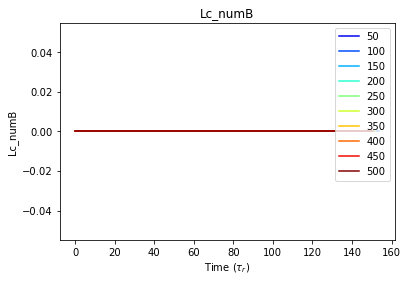

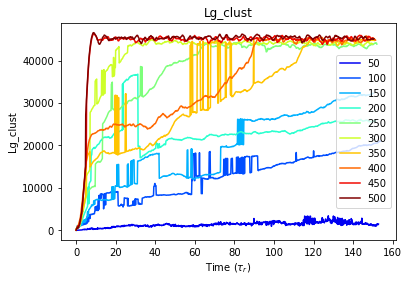

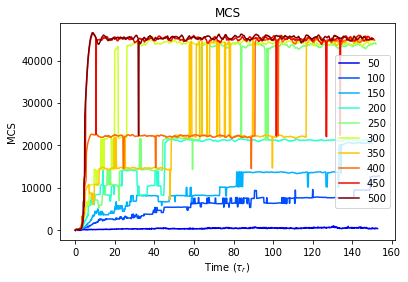

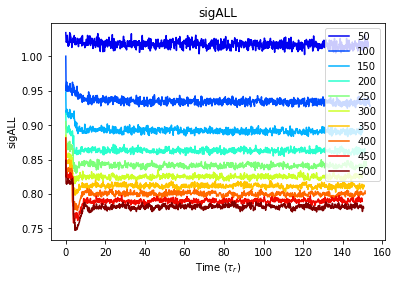

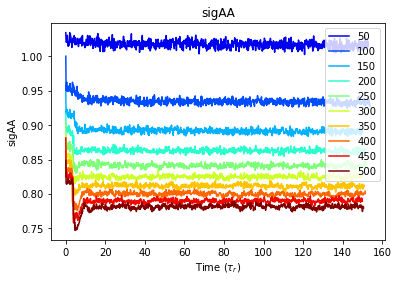

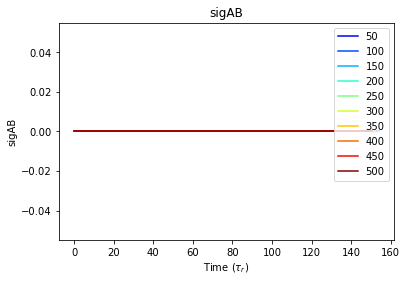

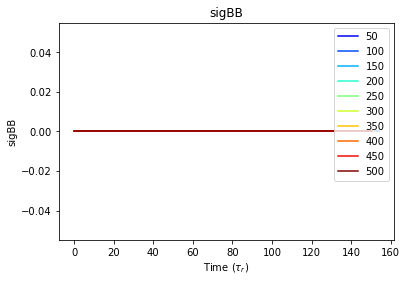

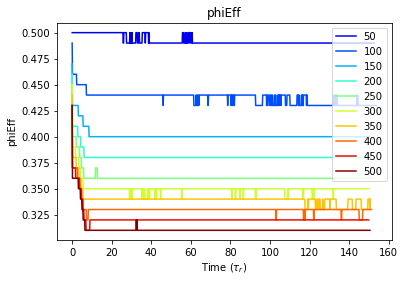

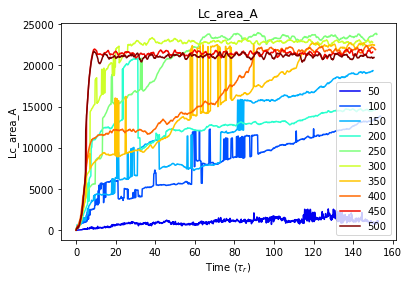

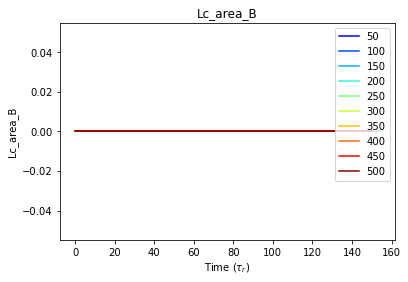

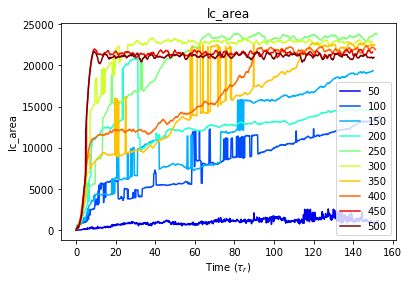

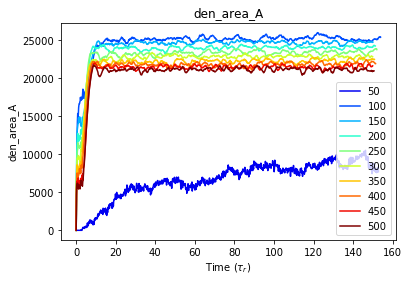

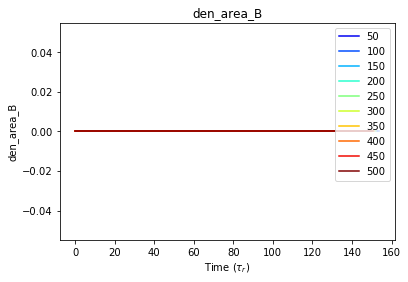

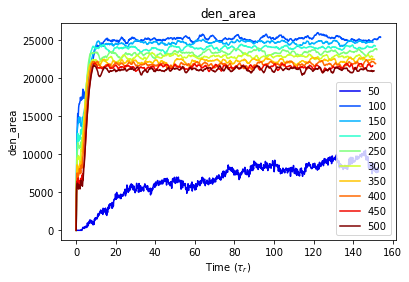

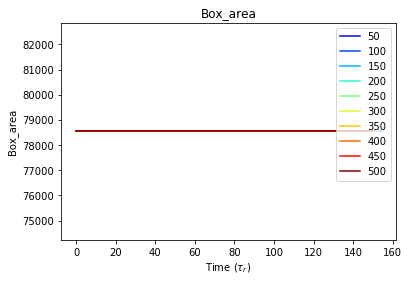

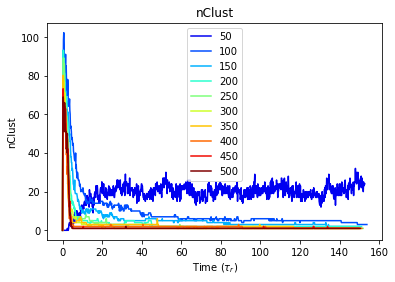

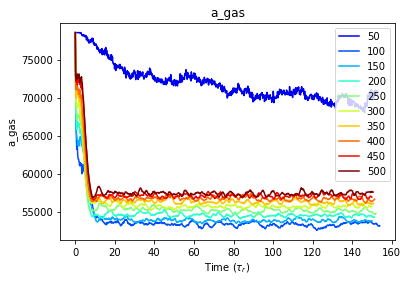

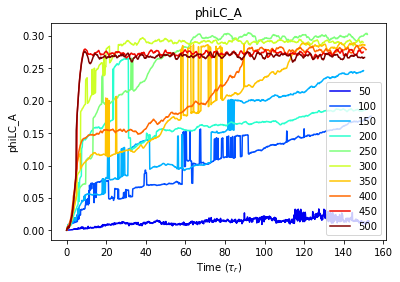

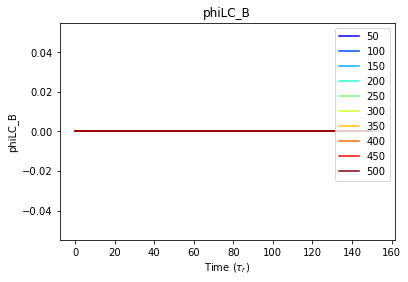

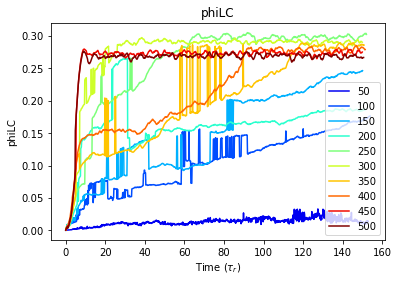

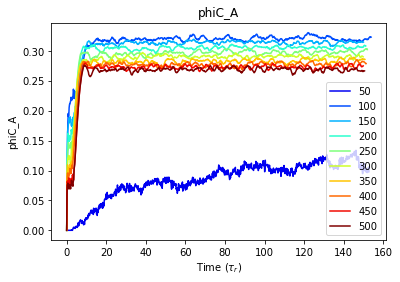

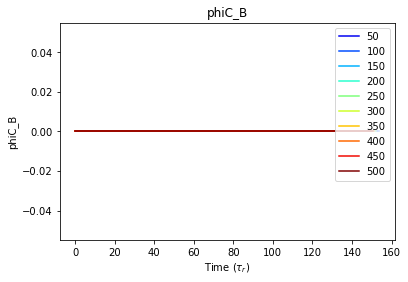

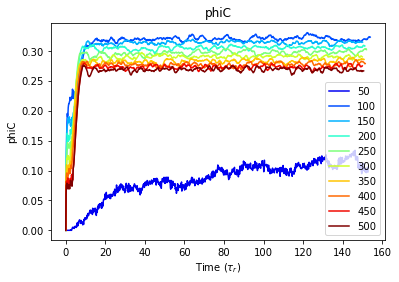

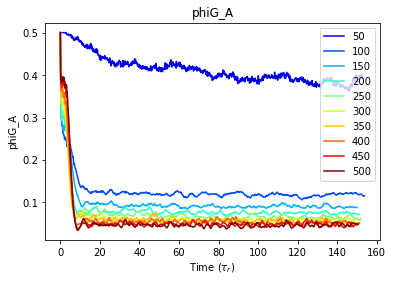

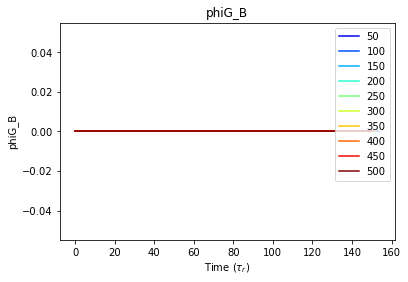

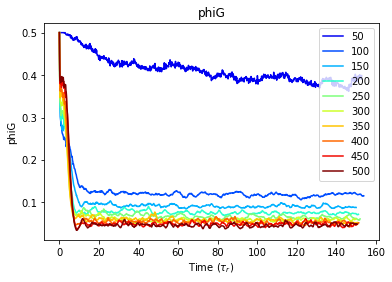

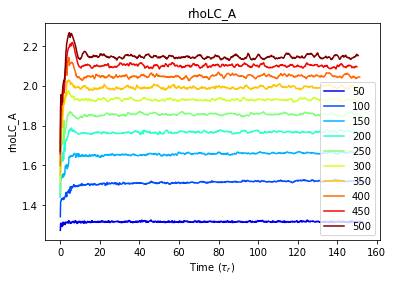

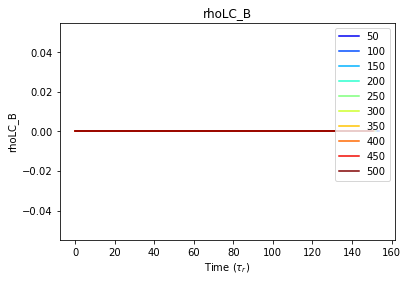

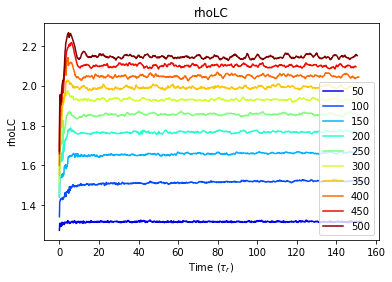

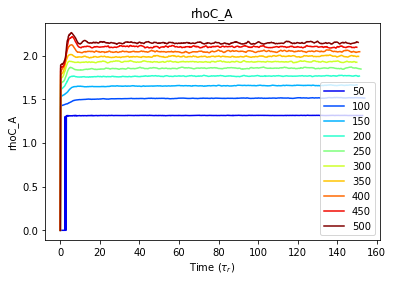

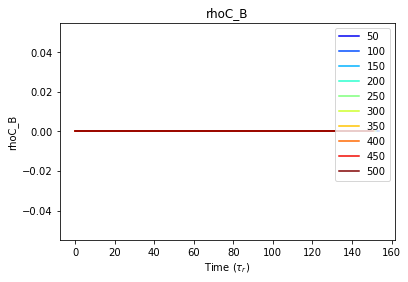

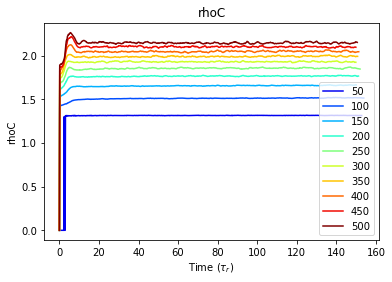

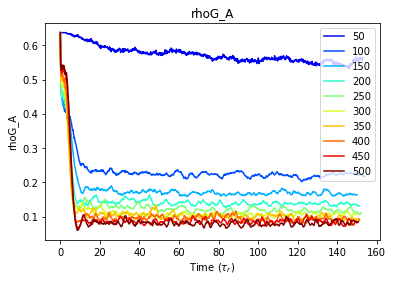

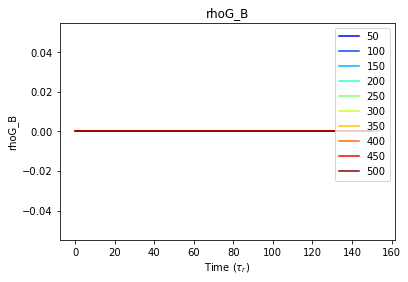

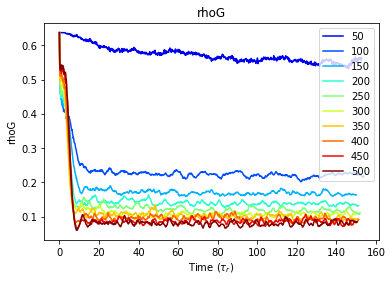

In [17]:
# %%capture
# Plot each column vs time for all files
for z in list(all_data[0]):
    for i in xrange(len(all_data)):
        plt.plot(all_data[i]['Timestep'], all_data[i][z], c=plt.cm.jet(params['pe'][i] / 500.), label=(params['pe'][i]))
    plt.xlabel(r'Time $(\tau_{r})$')
    plt.ylabel(z)
    plt.title(z)
    plt.legend()
    plt.show()

In [8]:
# Let's compute a moving average of the data
winSz = 2
perc = 0.05
ssIndex = [[] for x in all_data]
headers = list(all_data[0])
headers.remove('Timestep')
headers.remove('Box_area')
ssAvg = pd.DataFrame(columns=headers)

# Get the index at which each data set is at steady-state
for i in xrange(len(all_data)):
    # List to store the steady-state column averages
    ssMean = []
    
    for j in headers:
        # Get the final window average
        match = np.mean(all_data[i][j][-winSz:-1])
        # Compute the moving average for the column
        movAvg = all_data[i][j].rolling(window=winSz).mean()
        # Threshold number of indices which must be in agreement
        thresh = 0
        count = 0
        
        # Get the index that steady-state begins
        for k in xrange(len(movAvg)):
            # If the moving average is within 5% of the final average...
            if ((1. - perc) * match) <= movAvg[k] <= ((1. + perc) * match):
                count += 1
                if count > thresh:
                    # Store the index
                    ssIndex[i].append(k)
                    # Compute the steady-state average
                    ssMean.append(np.mean(all_data[i][j][k:-1]))
                    break
            # Not within margin, reset the consecutive count
            else:
                count = 0
                
    # Append list of steady-state averages to dataframe
    ss_df = pd.DataFrame([ssMean], columns=headers)
    ssAvg = ssAvg.append(ss_df, ignore_index=True)

# Normalize by number of particles 
    
# print(ssIndex)
# print(ssMean)
display(ssAvg)

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,nClust,a_gas,phiLC_A,phiLC_B,phiLC,phiC_A,phiC_B,phiC,phiG_A,phiG_B,phiG,rhoLC_A,rhoLC_B,rhoLC,rhoC_A,rhoC_B,rhoC,rhoG_A,rhoG_B,rhoG
0,39599.353293,0.0,39599.353293,11082.545272,0.0,11082.545272,1601.033994,0.0,1601.033994,511.772169,1.017840,1.017840,0.0,0.0,0.492282,1215.957185,0.0,1215.957185,8425.468727,0.0,8425.468727,20.551091,71058.290243,0.015482,0.0,0.015482,0.107276,0.0,0.107276,0.395994,0.0,0.395994,1.316281,0.0,1.316281,1.314805,0.0,1.314805,0.564295,0.0,0.564295
1,11924.072383,0.0,11924.072383,38054.042345,0.0,38054.042345,20322.220339,0.0,20322.220339,12710.100000,0.935177,0.935177,0.0,0.0,0.436972,13377.293188,0.0,13377.293188,25159.288857,0.0,25159.288857,3.000068,53395.849278,0.170325,0.0,0.170325,0.320338,0.0,0.320338,0.119241,0.0,0.119241,1.513887,0.0,1.513887,1.509541,0.0,1.509541,0.223450,0.0,0.223450
2,9167.110872,0.0,9167.110872,40825.202559,0.0,40825.202559,31471.984000,0.0,31471.984000,20442.854545,0.892489,0.892489,0.0,0.0,0.400511,18889.452592,0.0,18889.452592,24662.048688,0.0,24662.048688,2.009117,53894.536628,0.240508,0.0,0.240508,0.314007,0.0,0.314007,0.091671,0.0,0.091671,1.657197,0.0,1.657197,1.654376,0.0,1.654376,0.170145,0.0,0.170145
3,7651.579805,0.0,7651.579805,42338.578782,0.0,42338.578782,25582.610000,0.0,25582.610000,21233.454936,0.863669,0.863669,0.0,0.0,0.380113,14460.160877,0.0,14460.160877,23985.634913,0.0,23985.634913,2.000025,54562.162145,0.184112,0.0,0.184112,0.305395,0.0,0.305395,0.076516,0.0,0.076516,1.766634,0.0,1.766634,1.764502,0.0,1.764502,0.140322,0.0,0.140322
4,6482.594737,0.0,6482.594737,43248.070084,0.0,43248.070084,43497.316413,0.0,43497.316413,43184.773973,0.842022,0.842022,0.0,0.0,0.360144,23421.718658,0.0,23421.718658,23313.742296,0.0,23313.742296,1.015411,55232.683764,0.298215,0.0,0.298215,0.296840,0.0,0.296840,0.064826,0.0,0.064826,1.856042,0.0,1.856042,1.854668,0.0,1.854668,0.117598,0.0,0.117598
5,5956.670800,0.0,5956.670800,43962.944386,0.0,43962.944386,43960.947977,0.0,43960.947977,43327.993064,0.825487,0.825487,0.0,0.0,0.349495,22770.467381,0.0,22770.467381,22778.863217,0.0,22778.863217,1.033527,55775.112429,0.289923,0.0,0.289923,0.290029,0.0,0.290029,0.059567,0.0,0.059567,1.930922,0.0,1.930922,1.929631,0.0,1.929631,0.106883,0.0,0.106883
6,5774.533040,0.0,5774.533040,44190.424084,0.0,44190.424084,39413.885993,0.0,39413.885993,32667.592834,0.812311,0.812311,0.0,0.0,0.338918,19773.732035,0.0,19773.732035,22207.210886,0.0,22207.210886,1.530956,56343.926816,0.251767,0.0,0.251767,0.282751,0.0,0.282751,0.057745,0.0,0.057745,1.992365,0.0,1.992365,1.989948,0.0,1.989948,0.102502,0.0,0.102502
7,5388.732632,0.0,5388.732632,44607.694969,0.0,44607.694969,44832.616137,0.0,44832.616137,44807.635678,0.800274,0.800274,0.0,0.0,0.329773,21871.392043,0.0,21871.392043,21789.509600,0.0,21789.509600,1.002513,56760.242318,0.278475,0.0,0.278475,0.277433,0.0,0.277433,0.053887,0.0,0.053887,2.050298,0.0,2.050298,2.048609,0.0,2.048609,0.094928,0.0,0.094928
8,4909.991543,0.0,4909.991543,45085.562566,0.0,45085.562566,45083.485804,0.0,45083.485804,44921.567823,0.790070,0.790070,0.0,0.0,0.319907,21454.712126,0.0,21454.712126,21455.782577,0.0,21455.782577,1.007269,57092.476704,0.273170,0.0,0.273170,0.273183,0.0,0.273183,0.049100,0.0,0.049100,2.104140,0.0,2.104140,2.103850,0.0,2.103850,0.085993,0.0,0.085993
9,4645.922023,0.0,4645.922023,45348.896118,0.0,45348.896118,45348.224554,0.0,45348.224554,45301.785939,0.781588,0.781588,0.0,0.0,0.310093,21127.496494,0.0,21127.496494,21127.834246,0.0,21127.834246,1.002068,57422.195236,0.269004,0.0,0.269004,0.269008,0.0,0.269008,0.046459,0.0,0.046459,2.149413,0.0,2.149413,2.148816,0.0,2.148816,0.080898,0.0,0.080898


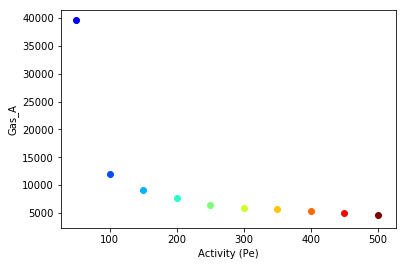

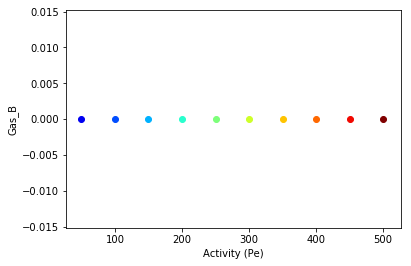

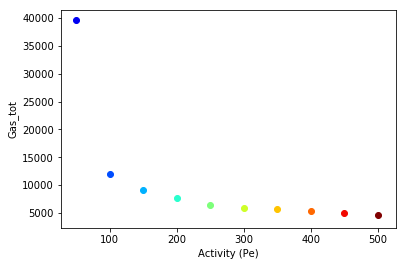

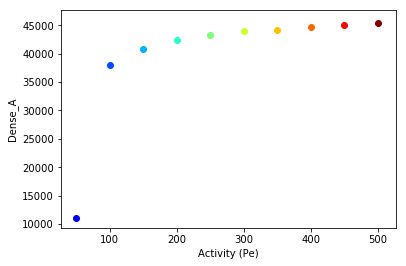

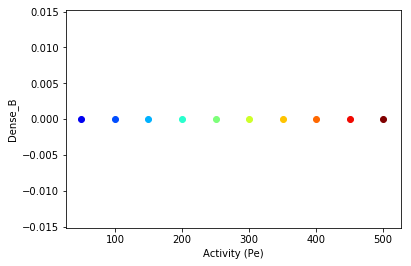

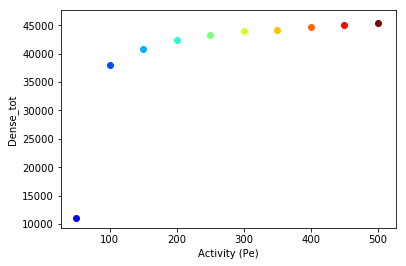

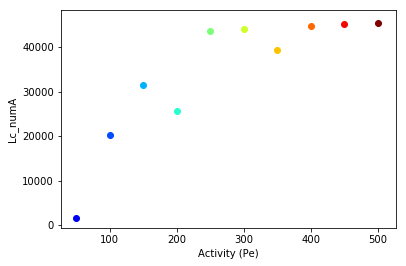

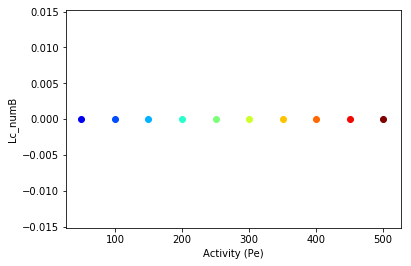

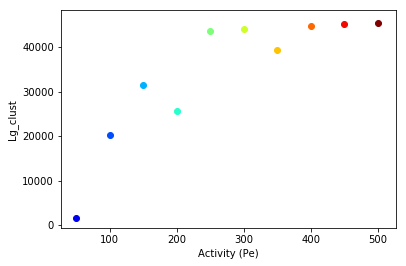

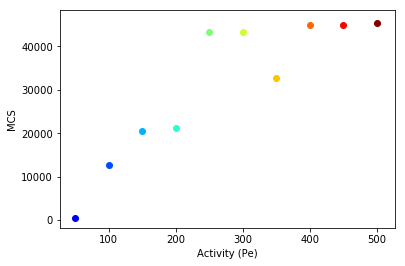

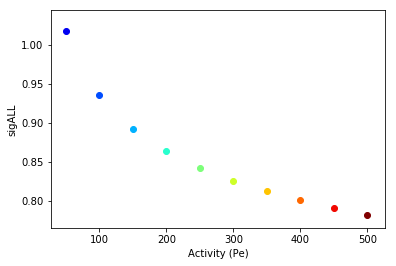

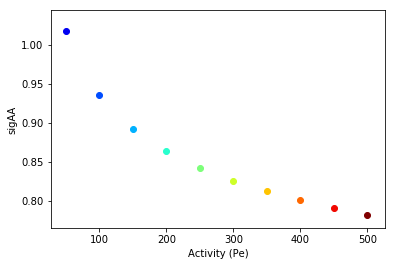

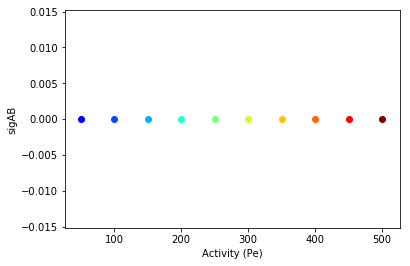

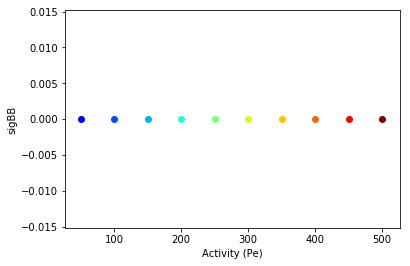

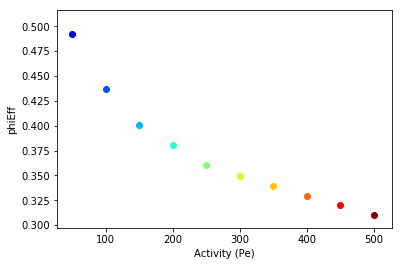

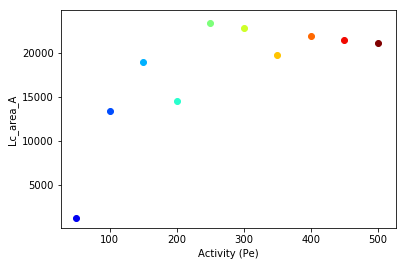

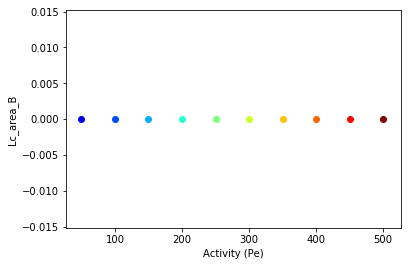

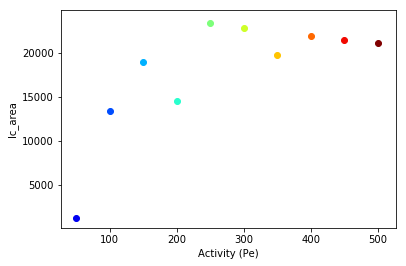

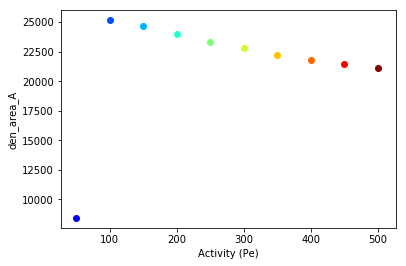

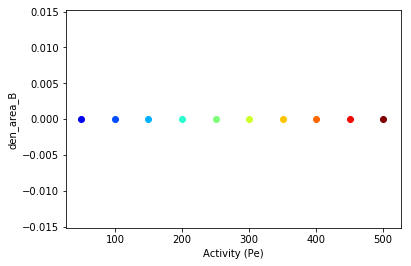

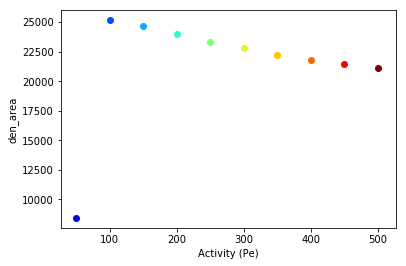

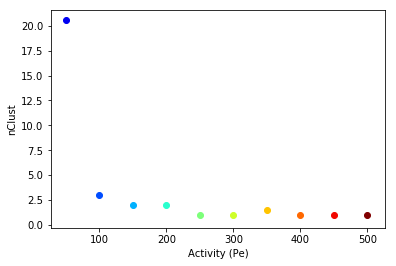

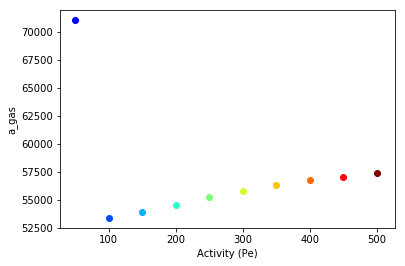

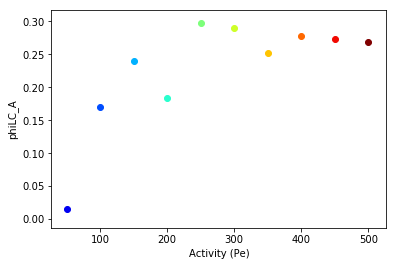

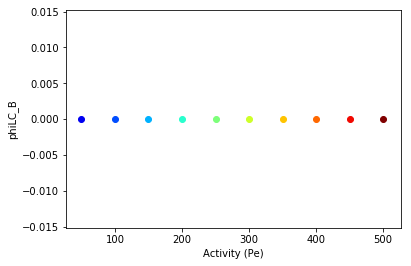

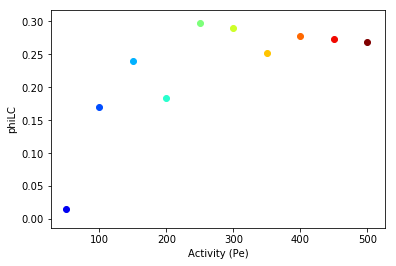

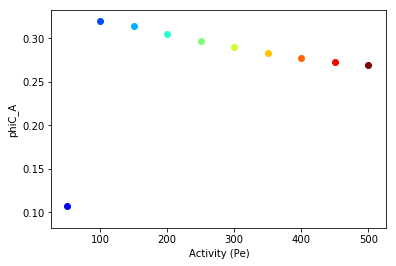

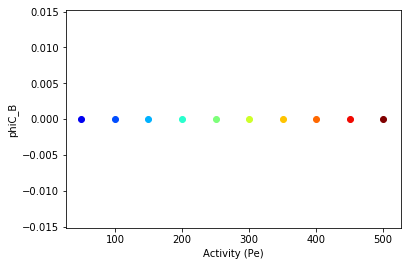

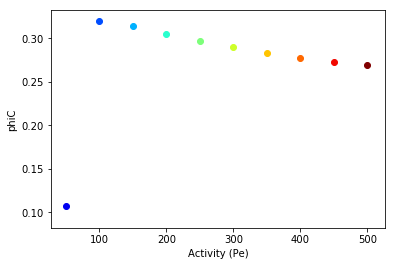

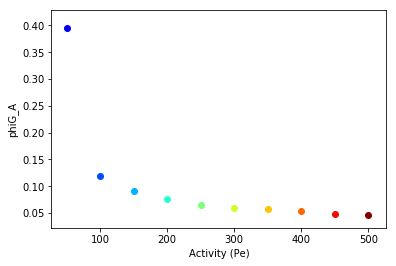

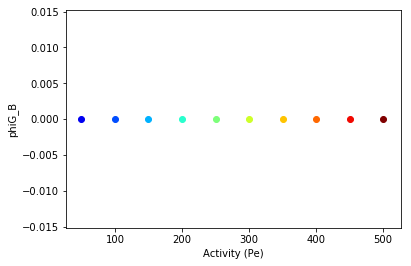

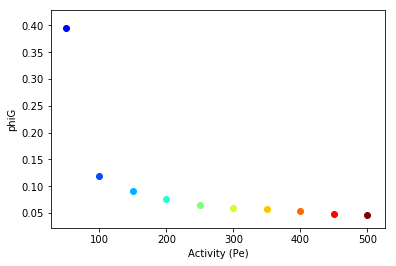

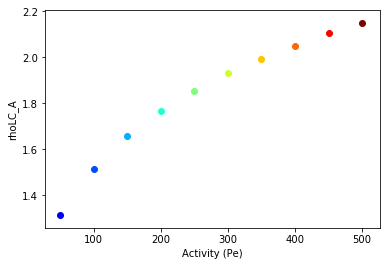

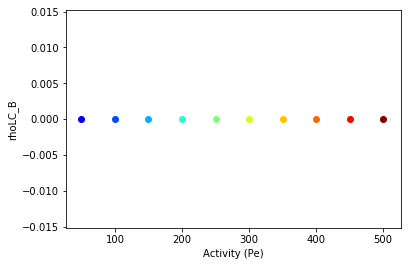

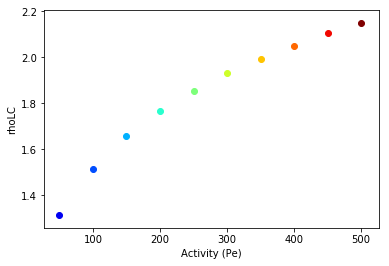

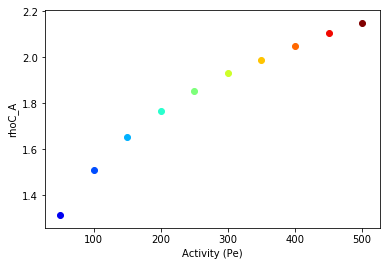

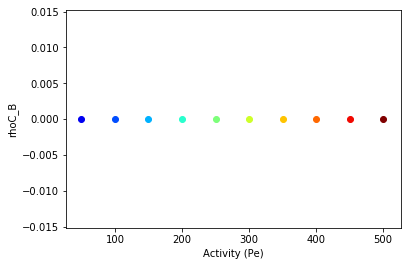

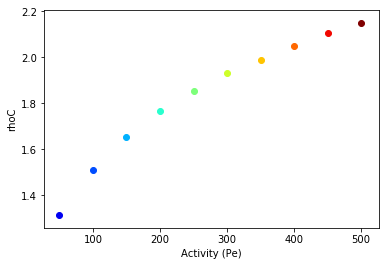

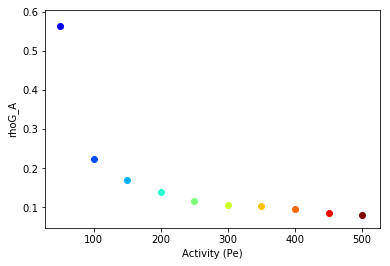

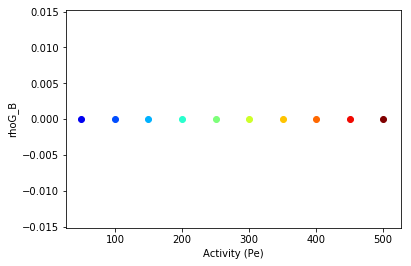

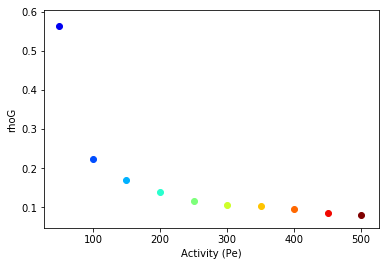

In [18]:
# Now plot the steady-state data vs input parameters
headers = list(ssAvg)
for z in headers:
    for i in xrange(len(all_data)):
        plt.scatter(params['pe'][i], ssAvg[z][i], c=plt.cm.jet(params['pe'][i] / 500.))
    plt.xlabel(r'Activity (Pe)')
    plt.ylabel(z)
    plt.show()